In [1]:
#Uncomment to run on Google Collab smoothly
#!git clone https://github.com/Shawn-Kim96/California_Wild_Fire_Prediction.git

Cloning into 'California_Wild_Fire_Prediction'...
remote: Enumerating objects: 378, done.
remote: Counting objects: 100% (138/138), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 378 (delta 60), reused 81 (delta 35), pack-reused 240 (from 1)
Receiving objects: 100% (378/378), 52.11 MiB | 4.10 MiB/s, done.
Resolving deltas: 100% (166/166), done.


In [2]:
import os
import numpy as np
import pandas as pd
import torch
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, roc_auc_score, f1_score,precision_score,recall_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import torch.nn as nn
import torch.nn.functional as F

In [3]:
all_data=pd.read_csv('/content/California_Wild_Fire_Prediction/data/final_data/total_data.csv')

In [4]:
all_data.shape

(4198, 92)

In [ ]:
all_data['is_fire']

,is_fire
0,0
1,0
2,0
3,0
4,0
...,...
4193,1
4194,1
4195,1
4196,1


In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(all_data, test_size=0.3)

In [ ]:
dev_set, test2 = train_test_split(test, test_size=0.5)

In [ ]:
from collections import Counter
Counter(train['is_fire'])

Counter({0: 1841, 1: 1097})

In [ ]:
all_data.columns

Index(['Unnamed: 0', 'DayAirTmpAvg01', 'DayAirTmpAvg02', 'DayAirTmpAvg03',
       'DayAirTmpAvg04', 'DayAirTmpAvg05', 'DayAirTmpAvg06', 'DayAirTmpAvg07',
       'DayAirTmpAvg08', 'DayAirTmpAvg09', 'DayAirTmpAvg10', 'DayAirTmpAvg11',
       'DayAirTmpAvg12', 'DayAirTmpAvg13', 'DayAirTmpAvg14', 'DayPrecip01',
       'DayPrecip02', 'DayPrecip03', 'DayPrecip04', 'DayPrecip05',
       'DayPrecip06', 'DayPrecip07', 'DayPrecip08', 'DayPrecip09',
       'DayPrecip10', 'DayPrecip11', 'DayPrecip12', 'DayPrecip13',
       'DayPrecip14', 'DayRelHumAvg01', 'DayRelHumAvg02', 'DayRelHumAvg03',
       'DayRelHumAvg04', 'DayRelHumAvg05', 'DayRelHumAvg06', 'DayRelHumAvg07',
       'DayRelHumAvg08', 'DayRelHumAvg09', 'DayRelHumAvg10', 'DayRelHumAvg11',
       'DayRelHumAvg12', 'DayRelHumAvg13', 'DayRelHumAvg14', 'DaySoilTmpAvg01',
       'DaySoilTmpAvg02', 'DaySoilTmpAvg03', 'DaySoilTmpAvg04',
       'DaySoilTmpAvg05', 'DaySoilTmpAvg06', 'DaySoilTmpAvg07',
       'DaySoilTmpAvg08', 'DaySoilTmpAvg09', 'Da

In [6]:
def show_null_counts(df):
    """
    Print the count of null values for only the columns in the DataFrame that contain null values.

    Parameters:
    df (pandas.DataFrame): The input DataFrame.
    """
    null_counts = df.isnull().sum()
    # Filter to only include columns where the null count is greater than 0
    null_counts_with_nulls = null_counts[null_counts > 0]

    if not null_counts_with_nulls.empty:
        print("Columns with null values:")
        print(null_counts_with_nulls)
    else:
        print("No null values found in the DataFrame.")
    print(null_counts_with_nulls[len(null_counts_with_nulls)-40:len(null_counts_with_nulls)-20])
    return null_counts_with_nulls
null_counts_with_nulls=show_null_counts(all_data)
print(all_data[len(null_counts_with_nulls)-40:len(null_counts_with_nulls)-20])

Columns with null values:
DayAirTmpAvg01     8
DayAirTmpAvg02     8
DayAirTmpAvg03     5
DayAirTmpAvg04     5
DayAirTmpAvg05     6
                  ..
DayWindSpdAvg07    2
DayWindSpdAvg08    1
DayWindSpdAvg09    1
DayWindSpdAvg11    2
DayWindSpdAvg14    1
Length: 61, dtype: int64
DayPrecip11         2
DayPrecip14         1
DayRelHumAvg01     30
DayRelHumAvg02     31
DayRelHumAvg03     23
DayRelHumAvg04     24
DayRelHumAvg05     17
DayRelHumAvg06     16
DayRelHumAvg07     25
DayRelHumAvg08     24
DayRelHumAvg09     28
DayRelHumAvg10     20
DayRelHumAvg11     24
DayRelHumAvg12     14
DayRelHumAvg13     26
DayRelHumAvg14     22
DaySoilTmpAvg01     9
DaySoilTmpAvg02    10
DaySoilTmpAvg03     4
DaySoilTmpAvg04     6
dtype: int64
    Unnamed: 0  DayAirTmpAvg01  DayAirTmpAvg02  DayAirTmpAvg03  \
21          21             9.2            12.2            13.3   
22          22            16.8            14.6            16.4   
23          23            19.1            20.8            20.6   
2

In [ ]:

for item in all_data.columns:
  print('column:'+item +': Unique Count',len(all_data[item].unique()))

#input_layer = Input(shape=(input_dim,))


column:Unnamed: 0: Unique Count 2614
column:DayAirTmpAvg01: Unique Count 365
column:DayAirTmpAvg02: Unique Count 357
column:DayAirTmpAvg03: Unique Count 359
column:DayAirTmpAvg04: Unique Count 362
column:DayAirTmpAvg05: Unique Count 357
column:DayAirTmpAvg06: Unique Count 352
column:DayAirTmpAvg07: Unique Count 358
column:DayAirTmpAvg08: Unique Count 358
column:DayAirTmpAvg09: Unique Count 357
column:DayAirTmpAvg10: Unique Count 367
column:DayAirTmpAvg11: Unique Count 353
column:DayAirTmpAvg12: Unique Count 355
column:DayAirTmpAvg13: Unique Count 356
column:DayAirTmpAvg14: Unique Count 360
column:DayPrecip01: Unique Count 166
column:DayPrecip02: Unique Count 162
column:DayPrecip03: Unique Count 161
column:DayPrecip04: Unique Count 166
column:DayPrecip05: Unique Count 164
column:DayPrecip06: Unique Count 159
column:DayPrecip07: Unique Count 169
column:DayPrecip08: Unique Count 150
column:DayPrecip09: Unique Count 161
column:DayPrecip10: Unique Count 169
column:DayPrecip11: Unique Count 

In [ ]:
print(all_data['date'][len(all_data['date'])-1])

2020-09-27T16:03:27Z


In [ ]:
print(all_data['date'])

0                 2022-06-02
1                 2022-08-12
2                 2010-01-27
3                 2012-12-02
4                 2013-09-11
                ...         
4193    2019-04-28T22:20:00Z
4194    2017-08-07T17:45:00Z
4195    2021-07-03T11:34:00Z
4196    2019-08-22T19:31:10Z
4197    2020-09-27T16:03:27Z
Name: date, Length: 4198, dtype: object


In [7]:
def process_and_fill_date_column(df, date_col='date'):
    """
    Process a mixed-format date column, extract date features,
    and fill missing values in those features.
    """
    df = df.copy()


    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

    # Extract features
    df[f'{date_col}_year'] = df[date_col].dt.year
    df[f'{date_col}_month'] = df[date_col].dt.month
    df[f'{date_col}_day'] = df[date_col].dt.day
    df[f'{date_col}_weekday'] = df[date_col].dt.weekday

    # Fill missing values with mode or a safe fallback
    for col in [f'{date_col}_year', f'{date_col}_month', f'{date_col}_day', f'{date_col}_weekday']:
        if df[col].isna().any():
            mode_val = df[col].mode(dropna=True)
            fallback = mode_val[0] if not mode_val.empty else 0
            df[col] = df[col].fillna(fallback)

    return df

process_and_fill_date_column(all_data).drop('date',axis=1)

,Unnamed: 0,DayAirTmpAvg01,DayAirTmpAvg02,DayAirTmpAvg03,DayAirTmpAvg04,DayAirTmpAvg05,DayAirTmpAvg06,DayAirTmpAvg07,DayAirTmpAvg08,DayAirTmpAvg09,...,is_fire,CBD_VALUE,EVC_VALUE,FBFM_VALUE,FDIST_VALUE,FVC_VALUE,date_year,date_month,date_day,date_weekday
0,0,25.8,19.7,20.7,22.4,23.4,24.8,26.3,22.8,18.9,...,0,1,251,-9999,112,125,2022.0,6.0,2.0,3.0
1,1,25.5,25.3,24.5,21.9,27.5,28.4,31.0,23.9,24.1,...,0,1,251,-9999,112,125,2022.0,8.0,12.0,4.0
2,2,11.0,14.5,14.4,13.1,11.4,11.3,8.8,10.0,9.3,...,0,16,166,-9999,112,106,2010.0,1.0,27.0,2.0
3,3,9.3,13.6,14.7,12.2,8.9,9.8,9.5,9.7,9.4,...,0,1,351,-9999,113,105,2012.0,12.0,2.0,6.0
4,4,24.9,24.4,26.0,27.5,25.7,24.9,23.9,23.3,22.8,...,0,11,176,-9999,113,114,2013.0,9.0,11.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4193,1579,20.3,17.8,14.3,16.7,20.5,23.4,19.3,15.6,19.2,...,1,11,176,-9999,113,114,2012.0,1.0,26.0,6.0
4194,1580,22.2,20.3,19.8,21.4,21.5,21.7,22.3,23.4,24.1,...,1,16,125,-9999,112,106,2012.0,1.0,26.0,6.0
4195,1581,19.1,18.4,19.0,19.1,19.2,19.1,19.5,19.1,18.6,...,1,11,176,-9999,113,114,2012.0,1.0,26.0,6.0
4196,1582,22.0,22.9,21.2,20.7,20.7,24.5,26.5,25.6,21.0,...,1,1,174,-9999,112,125,2012.0,1.0,26.0,6.0


In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.model_selection import train_test_split
import pandas as pd

class GEN_MAKE_UP_DATE(nn.Module):
   def __init__(self, input_shape):
      super(GEN_MAKE_UP_DATE, self).__init__()
      self.fc1= nn.Linear(input_shape, 55)
      self.fc2=nn.Linear(55, 55)
      self.batchNorm= nn.BatchNorm1d(55)
      self.fc3= nn.Linear(55, 1)

   def forward(self,x:torch.Tensor)-> torch.Tensor:
       x = F.relu(self.fc1(x))
       x = F.relu(self.batchNorm(self.fc2(x)))
       x = self.fc3(x)
       return x


columns_to_fix = [
    'DayPrecip11', 'DayPrecip14',
    'DayRelHumAvg01', 'DayRelHumAvg02', 'DayRelHumAvg03', 'DayRelHumAvg04',
    'DayRelHumAvg05', 'DayRelHumAvg06', 'DayRelHumAvg07', 'DayRelHumAvg08',
    'DayRelHumAvg09', 'DayRelHumAvg10', 'DayRelHumAvg11', 'DayRelHumAvg12',
    'DayRelHumAvg13', 'DayRelHumAvg14',
    'DaySoilTmpAvg01', 'DaySoilTmpAvg02', 'DaySoilTmpAvg03', 'DaySoilTmpAvg04'
]

def generate_models_via_DL(dataframe:pd.DataFrame, columns_to_fix:list=columns_to_fix)->dict:
    """
    Trains a separate deep learning regression model for each specified column with missing values,
    in order to later impute those missing values based on the learned relationships in the data.

    Input:
        dataframe (pd.DataFrame) :  The input dataset containing missing values.

        columns_to_fix (list): List of column names for which deep learning models will be trained to predict missing values.

    Returns:
          models (dict):  A dictionary containing trained PyTorch models keyed by the column name they were trained to predict,
              using the format 'model_fill_null_for_<column_name>'.

    """
    models = {}

    for item in columns_to_fix:
      temp_dataframe = dataframe.dropna(subset=[item])
      train, test = train_test_split(temp_dataframe, test_size=0.3, random_state=42)

      # Fill other missing values
      train = train.fillna(train.mean())
      test = test.fillna(train.mean())

      y_train = torch.tensor(train[item].values, dtype=torch.float32).view(-1, 1)
      y_test = torch.tensor(test[item].values, dtype=torch.float32).view(-1, 1)

      X_train = torch.tensor(train.drop(columns=[item]).values, dtype=torch.float32)
      X_test = torch.tensor(test.drop(columns=[item]).values, dtype=torch.float32)

      model = GEN_MAKE_UP_DATE(X_train.shape[1])
      optimizer = optim.Adam(model.parameters(), lr=0.001)

      def rmse_loss(pred, target):
          return torch.sqrt(nn.functional.mse_loss(pred, target))

      with torch.no_grad():
            preds = model(X_test)
            test_rmse = rmse_loss(preds, y_test)
            print(f"BEFORE TRAINING Test RMSE: {test_rmse.item():.4f}")


      model.train()
      for epoch in range(400):
        optimizer.zero_grad()
        output = model(X_train)

        loss = rmse_loss(output, y_train)
        loss.backward()
        optimizer.step()
        if(epoch==99):
           print('col', item)
           print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")
      model.eval()

      with torch.no_grad():
            preds = model(X_test)
            test_rmse = rmse_loss(preds, y_test)
            print(f"Test RMSE: {test_rmse.item():.4f}")
      models['model_fill_null_for_'+item]=model

    return models

models=generate_models_via_DL(process_and_fill_date_column(all_data).drop(['date','Unnamed: 0'],axis=1))

BEFORE TRAINING Test RMSE: 4.2900
col DayPrecip11
Epoch 100, Loss: 4.5665
Test RMSE: 4.1993
BEFORE TRAINING Test RMSE: 4.3249
col DayPrecip14
Epoch 100, Loss: 3.6454
Test RMSE: 1062.2915
BEFORE TRAINING Test RMSE: 61.2414
col DayRelHumAvg01
Epoch 100, Loss: 60.4930
Test RMSE: 47.0618
BEFORE TRAINING Test RMSE: 62.1515
col DayRelHumAvg02
Epoch 100, Loss: 60.4296
Test RMSE: 48.2019
BEFORE TRAINING Test RMSE: 62.1004
col DayRelHumAvg03
Epoch 100, Loss: 60.5896
Test RMSE: 47.8539
BEFORE TRAINING Test RMSE: 61.5878
col DayRelHumAvg04
Epoch 100, Loss: 60.8489
Test RMSE: 49.0499
BEFORE TRAINING Test RMSE: 61.5825
col DayRelHumAvg05
Epoch 100, Loss: 60.9494
Test RMSE: 47.9451
BEFORE TRAINING Test RMSE: 61.2163
col DayRelHumAvg06
Epoch 100, Loss: 60.5267
Test RMSE: 46.7641
BEFORE TRAINING Test RMSE: 60.9928
col DayRelHumAvg07
Epoch 100, Loss: 60.8302
Test RMSE: 185.9457
BEFORE TRAINING Test RMSE: 61.3211
col DayRelHumAvg08
Epoch 100, Loss: 60.4451
Test RMSE: 65.5647
BEFORE TRAINING Test RMSE: 6

## Writting the models

In [10]:
import os

os.makedirs("filling_nan_models", exist_ok=True)

for model_name, model in models.items():
    torch.save(model.state_dict(), os.path.join("filling_nan_models", f"{model_name}.pth"))


In [15]:
def get_model_for_column(column_name, models_directory="filling_nan_models")->torch.nn.Module | None:
    """
    Retrieves the trained PyTorch model for a specific column.

    input:
        column_name (str): The name of the column for which to retrieve the model.
        models_directory: The directory where the model files are saved.

    output:
        model (torch.nn.Module | None): loaded PyTorch model, or None if the model for the given column is not found
    """
    model_filename = f"model_fill_null_for_{column_name}.pth"
    model_filepath = os.path.join(models_directory, model_filename)

    if os.path.exists(model_filepath):

        model = GEN_MAKE_UP_DATE(input_shape=93) #FIX_ME: This is not dynamic as we might change the feature vector size
        model.load_state_dict(torch.load(model_filepath))
        model.eval()
        return model
    else:
        print(f"Model not found for column '{column_name}'")
        return None


In [16]:
def fill_missing_with_models(dataframe: pd.DataFrame, models: dict, columns_to_fix: list = columns_to_fix) -> pd.DataFrame:
    """
    Fills missing values in specified columns using pretrained deep learning models.

    Input:
        dataframe (pd.DataFrame): The input DataFrame containing missing values to be filled.

        models (dict) : A dictionary of trained PyTorch models, where each model corresponds to a specific column
            and is keyed as 'model_fill_null_for_<column_name>'.

    columns_to_fix (list) optional : List of column names to target for missing value imputation. Defaults to a global `columns_to_fix` list.

    Output:
       df (pd.DataFrame): A copy of the input DataFrame with missing values filled in the specified columns.

    """
    df = dataframe.copy()

    for col in columns_to_fix:
        model = models.get('model_fill_null_for_'+col)
        if model is None:
            print(f"Model for '{col}' not found, skipping.")
            continue

        missing_mask = df[col].isna()
        if missing_mask.sum() == 0:
            continue

        # Prepare input data for prediction
        input_data = df.loc[missing_mask].drop(columns=[col])
        input_data = input_data.fillna(input_data.mean())  # Handle any leftover NaNs in features

        X_missing = torch.tensor(input_data.values, dtype=torch.float32)

        model.eval()
        with torch.no_grad():
            predictions = model(X_missing).squeeze().numpy()

        # Fill predictions back into the DataFrame
        df.loc[missing_mask, col] = predictions

        print(f"Filled {missing_mask.sum()} missing values in '{col}'")

    return df


filled_df=fill_missing_with_models(process_and_fill_date_column(all_data).drop(['date','Unnamed: 0'],axis=1),models)


Filled 2 missing values in 'DayPrecip11'
Filled 1 missing values in 'DayPrecip14'
Filled 30 missing values in 'DayRelHumAvg01'
Filled 31 missing values in 'DayRelHumAvg02'
Filled 23 missing values in 'DayRelHumAvg03'
Filled 24 missing values in 'DayRelHumAvg04'
Filled 17 missing values in 'DayRelHumAvg05'
Filled 16 missing values in 'DayRelHumAvg06'
Filled 25 missing values in 'DayRelHumAvg07'
Filled 24 missing values in 'DayRelHumAvg08'
Filled 28 missing values in 'DayRelHumAvg09'
Filled 20 missing values in 'DayRelHumAvg10'
Filled 24 missing values in 'DayRelHumAvg11'
Filled 14 missing values in 'DayRelHumAvg12'
Filled 26 missing values in 'DayRelHumAvg13'
Filled 22 missing values in 'DayRelHumAvg14'
Filled 9 missing values in 'DaySoilTmpAvg01'
Filled 10 missing values in 'DaySoilTmpAvg02'
Filled 4 missing values in 'DaySoilTmpAvg03'
Filled 6 missing values in 'DaySoilTmpAvg04'


In [17]:
nan_rows = all_data[all_data[columns_to_fix].isna().any(axis=1)]
nan_rows

,Unnamed: 0,DayAirTmpAvg01,DayAirTmpAvg02,DayAirTmpAvg03,DayAirTmpAvg04,DayAirTmpAvg05,DayAirTmpAvg06,DayAirTmpAvg07,DayAirTmpAvg08,DayAirTmpAvg09,...,wildfire_hazard_potential,lat,lng,acres_burned,is_fire,CBD_VALUE,EVC_VALUE,FBFM_VALUE,FDIST_VALUE,FVC_VALUE
6,6,10.3,10.1,9.1,10.5,13.1,16.1,14.2,13.2,11.5,...,5533,36.016118,-118.828001,0.0,0,8,23,-9999,313,11
21,21,9.2,12.2,13.3,12.2,10.8,11.9,8.4,7.8,10.1,...,4319,37.719840,-121.535240,0.0,0,11,176,-9999,113,114
26,26,22.0,26.1,NaN,20.0,21.9,21.6,19.3,18.6,18.3,...,672,35.720588,-120.561774,0.0,0,11,176,-9999,113,114
36,36,17.4,16.1,14.0,12.7,11.1,10.9,11.1,14.4,16.4,...,326,34.307690,-117.288110,0.0,0,8,23,-9999,313,112
54,54,8.1,8.7,8.8,9.2,6.8,11.9,13.2,11.0,13.5,...,199,37.438803,-121.335653,0.0,0,11,176,-9999,113,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2442,2442,17.9,14.3,15.5,15.8,17.4,19.2,20.7,22.9,25.2,...,37,34.267348,-118.643816,0.0,0,1,164,-9999,112,106
2478,2478,NaN,26.8,22.5,22.4,24.4,22.0,21.6,22.0,22.9,...,310,39.524038,-121.650851,0.0,0,1,251,-9999,112,125
2484,2484,11.7,11.8,11.9,11.2,11.9,13.1,14.0,14.8,13.7,...,2256,33.432924,-117.246996,0.0,0,8,23,-9999,313,112
2527,2527,8.6,7.7,6.9,6.2,6.9,8.3,NaN,12.5,10.1,...,893,38.541660,-121.244380,0.0,0,1,251,-9999,112,125


In [ ]:
start, end= 54,55
print(all_data.iloc[start:end+1][columns_to_fix])
filled_df.iloc[start:end+1][columns_to_fix]

    DayPrecip11  DayPrecip14  DayRelHumAvg01  DayRelHumAvg02  DayRelHumAvg03  \
54          3.7          0.0            57.0            68.0            95.0   
55          0.0          0.3            75.0            73.0            73.0   

    DayRelHumAvg04  DayRelHumAvg05  DayRelHumAvg06  DayRelHumAvg07  \
54           100.0           100.0           100.0             NaN   
55            64.0            51.0            53.0            52.0   

    DayRelHumAvg08  DayRelHumAvg09  DayRelHumAvg10  DayRelHumAvg11  \
54             NaN             NaN            94.0            84.0   
55            69.0             NaN            65.0            72.0   

    DayRelHumAvg12  DayRelHumAvg13  DayRelHumAvg14  DaySoilTmpAvg01  \
54            75.0            79.0            61.0              8.6   
55            81.0            88.0            75.0             25.3   

    DaySoilTmpAvg02  DaySoilTmpAvg03  DaySoilTmpAvg04  
54              9.2              9.2              9.6  
55         

,DayPrecip11,DayPrecip14,DayRelHumAvg01,DayRelHumAvg02,DayRelHumAvg03,DayRelHumAvg04,DayRelHumAvg05,DayRelHumAvg06,DayRelHumAvg07,DayRelHumAvg08,DayRelHumAvg09,DayRelHumAvg10,DayRelHumAvg11,DayRelHumAvg12,DayRelHumAvg13,DayRelHumAvg14,DaySoilTmpAvg01,DaySoilTmpAvg02,DaySoilTmpAvg03,DaySoilTmpAvg04
54,3.7,0.0,57.0,68.0,95.0,100.0,100.0,100.0,12.592447,10.415466,13.004410,94.0,84.0,75.0,79.0,61.0,8.6,9.2,9.2,9.6
55,0.0,0.3,75.0,73.0,73.0,64.0,51.0,53.0,52.000000,69.000000,12.984635,65.0,72.0,81.0,88.0,75.0,25.3,24.8,24.4,24.2


In [ ]:
all_data

,Unnamed: 0,DayAirTmpAvg01,DayAirTmpAvg02,DayAirTmpAvg03,DayAirTmpAvg04,DayAirTmpAvg05,DayAirTmpAvg06,DayAirTmpAvg07,DayAirTmpAvg08,DayAirTmpAvg09,...,wildfire_hazard_potential,lat,lng,acres_burned,is_fire,CBD_VALUE,EVC_VALUE,FBFM_VALUE,FDIST_VALUE,FVC_VALUE
0,0,25.8,19.7,20.7,22.4,23.4,24.8,26.3,22.8,18.9,...,141,37.471329,-121.237370,0.0,0,1,251,-9999,112,125
1,1,25.5,25.3,24.5,21.9,27.5,28.4,31.0,23.9,24.1,...,1869,39.325600,-121.368600,0.0,0,1,251,-9999,112,125
2,2,11.0,14.5,14.4,13.1,11.4,11.3,8.8,10.0,9.3,...,3128,33.932440,-117.034590,0.0,0,16,166,-9999,112,106
3,3,9.3,13.6,14.7,12.2,8.9,9.8,9.5,9.7,9.4,...,6372,39.493500,-123.396500,0.0,0,1,351,-9999,113,105
4,4,24.9,24.4,26.0,27.5,25.7,24.9,23.9,23.3,22.8,...,6033,36.916374,-120.657895,0.0,0,11,176,-9999,113,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4193,1579,20.3,17.8,14.3,16.7,20.5,23.4,19.3,15.6,19.2,...,288,35.817780,-120.097150,161.0,1,11,176,-9999,113,114
4194,1580,22.2,20.3,19.8,21.4,21.5,21.7,22.3,23.4,24.1,...,228,41.853000,-123.676000,3142.0,1,16,125,-9999,112,106
4195,1581,19.1,18.4,19.0,19.1,19.2,19.1,19.5,19.1,18.6,...,355,33.119448,-116.677511,173.0,1,11,176,-9999,113,114
4196,1582,22.0,22.9,21.2,20.7,20.7,24.5,26.5,25.6,21.0,...,462,33.450600,-116.857817,34.0,1,1,174,-9999,112,125


In [ ]:
filled_df.dropna()

,DayAirTmpAvg01,DayAirTmpAvg02,DayAirTmpAvg03,DayAirTmpAvg04,DayAirTmpAvg05,DayAirTmpAvg06,DayAirTmpAvg07,DayAirTmpAvg08,DayAirTmpAvg09,DayAirTmpAvg10,...,is_fire,CBD_VALUE,EVC_VALUE,FBFM_VALUE,FDIST_VALUE,FVC_VALUE,date_year,date_month,date_day,date_weekday
0,25.8,19.7,20.7,22.4,23.4,24.8,26.3,22.8,18.9,19.4,...,0,1,251,-9999,112,125,2022.0,6.0,2.0,3.0
1,25.5,25.3,24.5,21.9,27.5,28.4,31.0,23.9,24.1,24.6,...,0,1,251,-9999,112,125,2022.0,8.0,12.0,4.0
2,11.0,14.5,14.4,13.1,11.4,11.3,8.8,10.0,9.3,6.3,...,0,16,166,-9999,112,106,2010.0,1.0,27.0,2.0
3,9.3,13.6,14.7,12.2,8.9,9.8,9.5,9.7,9.4,14.2,...,0,1,351,-9999,113,105,2012.0,12.0,2.0,6.0
4,24.9,24.4,26.0,27.5,25.7,24.9,23.9,23.3,22.8,23.3,...,0,11,176,-9999,113,114,2013.0,9.0,11.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4193,20.3,17.8,14.3,16.7,20.5,23.4,19.3,15.6,19.2,21.9,...,1,11,176,-9999,113,114,2012.0,1.0,26.0,6.0
4194,22.2,20.3,19.8,21.4,21.5,21.7,22.3,23.4,24.1,24.1,...,1,16,125,-9999,112,106,2012.0,1.0,26.0,6.0
4195,19.1,18.4,19.0,19.1,19.2,19.1,19.5,19.1,18.6,18.1,...,1,11,176,-9999,113,114,2012.0,1.0,26.0,6.0
4196,22.0,22.9,21.2,20.7,20.7,24.5,26.5,25.6,21.0,19.0,...,1,1,174,-9999,112,125,2012.0,1.0,26.0,6.0


In [ ]:
all_data.dropna()

,Unnamed: 0,DayAirTmpAvg01,DayAirTmpAvg02,DayAirTmpAvg03,DayAirTmpAvg04,DayAirTmpAvg05,DayAirTmpAvg06,DayAirTmpAvg07,DayAirTmpAvg08,DayAirTmpAvg09,...,wildfire_hazard_potential,lat,lng,acres_burned,is_fire,CBD_VALUE,EVC_VALUE,FBFM_VALUE,FDIST_VALUE,FVC_VALUE
0,0,25.8,19.7,20.7,22.4,23.4,24.8,26.3,22.8,18.9,...,141,37.471329,-121.237370,0.0,0,1,251,-9999,112,125
1,1,25.5,25.3,24.5,21.9,27.5,28.4,31.0,23.9,24.1,...,1869,39.325600,-121.368600,0.0,0,1,251,-9999,112,125
2,2,11.0,14.5,14.4,13.1,11.4,11.3,8.8,10.0,9.3,...,3128,33.932440,-117.034590,0.0,0,16,166,-9999,112,106
3,3,9.3,13.6,14.7,12.2,8.9,9.8,9.5,9.7,9.4,...,6372,39.493500,-123.396500,0.0,0,1,351,-9999,113,105
4,4,24.9,24.4,26.0,27.5,25.7,24.9,23.9,23.3,22.8,...,6033,36.916374,-120.657895,0.0,0,11,176,-9999,113,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4193,1579,20.3,17.8,14.3,16.7,20.5,23.4,19.3,15.6,19.2,...,288,35.817780,-120.097150,161.0,1,11,176,-9999,113,114
4194,1580,22.2,20.3,19.8,21.4,21.5,21.7,22.3,23.4,24.1,...,228,41.853000,-123.676000,3142.0,1,16,125,-9999,112,106
4195,1581,19.1,18.4,19.0,19.1,19.2,19.1,19.5,19.1,18.6,...,355,33.119448,-116.677511,173.0,1,11,176,-9999,113,114
4196,1582,22.0,22.9,21.2,20.7,20.7,24.5,26.5,25.6,21.0,...,462,33.450600,-116.857817,34.0,1,1,174,-9999,112,125


In [ ]:
filled_df.columns

Index(['DayAirTmpAvg01', 'DayAirTmpAvg02', 'DayAirTmpAvg03', 'DayAirTmpAvg04',
       'DayAirTmpAvg05', 'DayAirTmpAvg06', 'DayAirTmpAvg07', 'DayAirTmpAvg08',
       'DayAirTmpAvg09', 'DayAirTmpAvg10', 'DayAirTmpAvg11', 'DayAirTmpAvg12',
       'DayAirTmpAvg13', 'DayAirTmpAvg14', 'DayPrecip01', 'DayPrecip02',
       'DayPrecip03', 'DayPrecip04', 'DayPrecip05', 'DayPrecip06',
       'DayPrecip07', 'DayPrecip08', 'DayPrecip09', 'DayPrecip10',
       'DayPrecip11', 'DayPrecip12', 'DayPrecip13', 'DayPrecip14',
       'DayRelHumAvg01', 'DayRelHumAvg02', 'DayRelHumAvg03', 'DayRelHumAvg04',
       'DayRelHumAvg05', 'DayRelHumAvg06', 'DayRelHumAvg07', 'DayRelHumAvg08',
       'DayRelHumAvg09', 'DayRelHumAvg10', 'DayRelHumAvg11', 'DayRelHumAvg12',
       'DayRelHumAvg13', 'DayRelHumAvg14', 'DaySoilTmpAvg01',
       'DaySoilTmpAvg02', 'DaySoilTmpAvg03', 'DaySoilTmpAvg04',
       'DaySoilTmpAvg05', 'DaySoilTmpAvg06', 'DaySoilTmpAvg07',
       'DaySoilTmpAvg08', 'DaySoilTmpAvg09', 'DaySoilTmpAvg10'

In [18]:
class Fire_prediction_model(nn.Module):
   """
   Adhereing to the professor's demands, this shallow and not deep nueral network acts as a skeleton model for how our DL implementation
   will be predicting.
   input:
       input_shape (int): The number of featurees to be inputed to the network.
   output:
       x (torch.Tensor): our prediction from mode.forward(x)

   """
   def __init__(self, input_shape:int, output_shape:int=1):
      super(Fire_prediction_model, self).__init__()
      self.fc1 = nn.Linear(input_shape, 55)
      self.fc2 = nn.Linear(55, 55)
      self.batchNorm = nn.BatchNorm1d(55)
      self.fc3 = nn.Linear(55, output_shape)

   def forward(self, x: torch.Tensor) -> torch.Tensor:
       x = F.relu(self.fc1(x))
       x = F.relu(self.batchNorm(self.fc2(x)))
       x = self.fc3(x)
       return x

features_to_train_cols=['DayAirTmpAvg01', 'DayAirTmpAvg02', 'DayAirTmpAvg03', 'DayAirTmpAvg04',
       'DayAirTmpAvg05', 'DayAirTmpAvg06', 'DayAirTmpAvg07', 'DayAirTmpAvg08',
       'DayAirTmpAvg09', 'DayAirTmpAvg10', 'DayAirTmpAvg11', 'DayAirTmpAvg12',
       'DayAirTmpAvg13', 'DayAirTmpAvg14', 'DayPrecip01', 'DayPrecip02',
       'DayPrecip03', 'DayPrecip04', 'DayPrecip05', 'DayPrecip06',
       'DayPrecip07', 'DayPrecip08', 'DayPrecip09', 'DayPrecip10',
       'DayPrecip11', 'DayPrecip12', 'DayPrecip13', 'DayPrecip14',
       'DayRelHumAvg01', 'DayRelHumAvg02', 'DayRelHumAvg03', 'DayRelHumAvg04',
       'DayRelHumAvg05', 'DayRelHumAvg06', 'DayRelHumAvg07', 'DayRelHumAvg08',
       'DayRelHumAvg09', 'DayRelHumAvg10', 'DayRelHumAvg11', 'DayRelHumAvg12',
       'DayRelHumAvg13', 'DayRelHumAvg14', 'DaySoilTmpAvg01',
       'DaySoilTmpAvg02', 'DaySoilTmpAvg03', 'DaySoilTmpAvg04',
       'DaySoilTmpAvg05', 'DaySoilTmpAvg06', 'DaySoilTmpAvg07',
       'DaySoilTmpAvg08', 'DaySoilTmpAvg09', 'DaySoilTmpAvg10',
       'DaySoilTmpAvg11', 'DaySoilTmpAvg12', 'DaySoilTmpAvg13',
       'DaySoilTmpAvg14', 'DayWindSpdAvg01', 'DayWindSpdAvg02',
       'DayWindSpdAvg03', 'DayWindSpdAvg04', 'DayWindSpdAvg05',
       'DayWindSpdAvg06', 'DayWindSpdAvg07', 'DayWindSpdAvg08',
       'DayWindSpdAvg09', 'DayWindSpdAvg10', 'DayWindSpdAvg11',
       'DayWindSpdAvg12', 'DayWindSpdAvg13', 'DayWindSpdAvg14',
       'burn_probability', 'conditional_flame_length',
       'conditional_risk_to_structures', 'distance_km', 'exposure',
       'flame_length_exceedance_4ft', 'flame_length_exceedance_8ft',
       'latitude', 'longitude', 'risk_to_structures',
       'wildfire_hazard_potential', 'lat', 'lng',
       'CBD_VALUE', 'EVC_VALUE', 'FBFM_VALUE', 'FDIST_VALUE', 'FVC_VALUE',
       'date_year', 'date_month', 'date_day', 'date_weekday']


label_cols=['acres_burned', 'is_fire']

def train_model_on_fire_prediction(dataframe: pd.DataFrame, features_to_train_cols:list,label_cols:list,type_col: int = 1) -> (dict, dict):
    """
    This method automates trainning of models for 2 tasks
    input:
        dataframe  (pd.DataFrame):  Our features to use to train our data on
        type_col   (int) DEFAULT 1: What type of training will be conducted
                1: Logestic Regression
                0: Linear Regression
    output:
        models (dict): A dictionary of models that have been trained on the task.
        models_stats (dict): A dictionary of model statistics on model performance on test, val on different metrics.
    """
    models = {}
    models_stats = {}
    train, test = train_test_split(dataframe, test_size=0.3)
    val, test = train_test_split(test, test_size=0.5, random_state=42)

    # Fill NaNs
    train = train.fillna(train.mean())
    val = val.fillna(train.mean())
    test = test.fillna(train.mean())

    X_train_np = train[features_to_train_cols].values
    X_val_np = val[features_to_train_cols].values
    X_test_np = test[features_to_train_cols].values
    y_train_np = train[label_cols[type_col]].values
    y_val_np = val[label_cols[type_col]].values
    y_test_np = test[label_cols[type_col]].values

    if type_col == 1:
        # Classification
        models['LogisticRegression'] =LogisticRegression(max_iter=1000)
        models['SGDClassifier'] =SGDClassifier(loss='log_loss')
        models['SVC']=SVC(probability=True)
        models['XGBClassifier']=XGBClassifier(use_label_encoder=False, eval_metric='logloss')


        for name, model in models.items():
            model.fit(X_train_np, y_train_np)
            val_preds = model.predict(X_val_np)
            test_preds = model.predict(X_test_np)

            val_acc = accuracy_score(y_val_np, val_preds)
            val_auc = roc_auc_score(y_val_np, model.predict_proba(X_val_np)[:,1])
            test_acc = accuracy_score(y_test_np, test_preds)
            test_auc = roc_auc_score(y_test_np, model.predict_proba(X_test_np)[:,1])

            val_f1 = f1_score(y_val_np, val_preds)
            test_f1 = f1_score(y_test_np, test_preds)

            models_stats[name] = {
                'val_acc': val_acc, 'val_auc': val_auc, 'val_f1': val_f1,
                'test_acc': test_acc, 'test_auc': test_auc, 'test_f1': test_f1
            }
            print(f"{name}: VAL_ACC={val_acc:.4f}, VAL_AUC={val_auc:.4f}, VAL_F1={val_f1:.4f}, "
                  f"TEST_ACC={test_acc:.4f}, TEST_AUC={test_auc:.4f}, TEST_F1={test_f1:.4f}")


        # Deep learning classifier
        model = Fire_prediction_model(X_train_np.shape[1], output_shape=1)
        loss_fn = nn.BCEWithLogitsLoss()
    else:
        # Regression
        models['LinearRegression'] = LinearRegression()
        models['DecisionTreeRegressor'] = DecisionTreeRegressor()
        models['RandomForestRegressor'] = RandomForestRegressor(n_estimators=100)
        models['XGBRegressor'] = XGBRegressor(objective='reg:squarederror')


        for name, model in models.items():
            model.fit(X_train_np, y_train_np)
            val_preds = model.predict(X_val_np)
            test_preds = model.predict(X_test_np)

            val_rmse = mean_squared_error(y_val_np, val_preds)
            val_r2 = r2_score(y_val_np, val_preds)
            test_rmse = mean_squared_error(y_test_np, test_preds)
            test_r2 = r2_score(y_test_np, test_preds)

            models_stats[name] = {
                'val_rmse': val_rmse, 'val_r2': val_r2,
                'test_rmse': test_rmse, 'test_r2': test_r2
            }

            print(f"{name}: VAL_RMSE={val_rmse:.4f}, VAL_R2={val_r2:.4f}, TEST_RMSE={test_rmse:.4f}, TEST_R2={test_r2:.4f}")

        # Deep learning regressor
        model = Fire_prediction_model(X_train_np.shape[1], output_shape=1)
        loss_fn = nn.MSELoss()

    # Torch training
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    X_train = torch.tensor(X_train_np, dtype=torch.float32)
    X_val = torch.tensor(X_val_np, dtype=torch.float32)
    X_test = torch.tensor(X_test_np, dtype=torch.float32)

    if type_col == 1:
        y_train = torch.tensor(y_train_np.reshape(-1, 1), dtype=torch.float32)
        y_val = torch.tensor(y_val_np.reshape(-1, 1), dtype=torch.float32)
        y_test = torch.tensor(y_test_np.reshape(-1, 1), dtype=torch.float32)
    else:
        y_train = torch.tensor(y_train_np.reshape(-1, 1), dtype=torch.float32)
        y_val = torch.tensor(y_val_np.reshape(-1, 1), dtype=torch.float32)
        y_test = torch.tensor(y_test_np.reshape(-1, 1), dtype=torch.float32)

    model.train()
    for epoch in range(400):
        optimizer.zero_grad()
        preds = model(X_train)
        loss = loss_fn(preds, y_train)
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        val_preds = model(X_val).squeeze().numpy()
        test_preds = model(X_test).squeeze().numpy()
        if type_col == 1:
            val_probs = torch.sigmoid(model(X_val)).squeeze().numpy()
            test_probs = torch.sigmoid(model(X_test)).squeeze().numpy()
            threshold=0.5
            val_preds = (abs(val_probs) < threshold).astype(int)
            test_preds = (abs(test_probs) < threshold).astype(int)

            val_acc = accuracy_score(y_val.numpy(), val_preds)
            val_auc = roc_auc_score(y_val.numpy(), val_probs)
            test_acc = accuracy_score(y_test.numpy(), test_preds)
            test_auc = roc_auc_score(y_test.numpy(), test_probs)

            val_f1 = f1_score(y_val.numpy(), val_preds)
            test_f1 = f1_score(y_test.numpy(), test_preds)

            models_stats['DeepLearning'] = {
                'val_acc': val_acc, 'val_auc': val_auc, 'val_f1': val_f1,
                'test_acc': test_acc, 'test_auc': test_auc, 'test_f1': test_f1
            }


            models['deep_learning_logistic_regression']=model
            print(f"DeepLearning: VAL_ACC={val_acc}, VAL_AUC={val_auc}, TEST_ACC={test_acc}, TEST_AUC={test_auc}, F1_VAL ={val_f1}, Test_f1= {val_f1}")

        else:
            val_rmse = mean_squared_error(y_val.numpy(), val_preds)
            val_r2 = r2_score(y_val.numpy(), val_preds)
            test_rmse = mean_squared_error(y_test.numpy(), test_preds)
            test_r2 = r2_score(y_test.numpy(), test_preds)

            models_stats['DeepLearning'] = {
                'val_rmse': val_rmse, 'val_r2': val_r2,
                'test_rmse': test_rmse, 'test_r2': test_r2
            }
            models['deep_learning_linear_regression']=model
            print(f"DeepLearning: VAL_RMSE={val_rmse}, VAL_R2={val_r2}, TEST_RMSE={test_rmse}, TEST_R2={test_r2}")


    train_set= (X_train_np,y_train_np)
    val_set=(X_val_np,y_val_np)
    test_set=(X_test_np,y_test_np)
    data_used= (train_set, val_set, test_set)
    return models, models_stats, data_used

models_trained, models_trained_stats, data_used=train_model_on_fire_prediction(filled_df,features_to_train_cols,label_cols,1)

LogisticRegression: VAL_ACC=1.0000, VAL_AUC=1.0000, VAL_F1=1.0000, TEST_ACC=1.0000, TEST_AUC=1.0000, TEST_F1=1.0000


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier: VAL_ACC=0.6921, VAL_AUC=0.6631, VAL_F1=0.5670, TEST_ACC=0.6857, TEST_AUC=0.6567, TEST_F1=0.5600
SVC: VAL_ACC=0.6397, VAL_AUC=0.6554, VAL_F1=0.0000, TEST_ACC=0.6365, TEST_AUC=0.6629, TEST_F1=0.0000


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:19:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier: VAL_ACC=1.0000, VAL_AUC=1.0000, VAL_F1=1.0000, TEST_ACC=1.0000, TEST_AUC=1.0000, TEST_F1=1.0000
DeepLearning: VAL_ACC=0.3603174603174603, VAL_AUC=0.8893212798285983, TEST_ACC=0.3634920634920635, TEST_AUC=0.8893051214757866, F1_VAL =0.5297549591598599, Test_f1= 0.5297549591598599


# To load up trained models

In [22]:
import joblib

def save_models(models: dict, save_dir: str = "main_models"):
    os.makedirs(save_dir, exist_ok=True)

    for name, model in models.items():
        model_path = os.path.join(save_dir, f"{name}.pkl" if not isinstance(model, torch.nn.Module) else f"{name}.pth")

        if isinstance(model, torch.nn.Module):
            torch.save(model.state_dict(), model_path)
        else:
            joblib.dump(model, model_path)

    print(f"Models saved to {save_dir}")
save_models(models_trained, save_dir="main_models")


def load_models(save_dir: str = "main_models", input_shape: int = 92) -> dict:
    loaded_models = {}
    for filename in os.listdir(save_dir):
        model_path = os.path.join(save_dir, filename)
        name, ext = os.path.splitext(filename)

        if ext == '.pth':
            model = Fire_prediction_model(input_shape=input_shape)
            model.load_state_dict(torch.load(model_path))
            model.eval()
            loaded_models[name] = model
        elif ext == '.pkl':
            loaded_models[name] = joblib.load(model_path)
        else:
            print(f"Unrecognized file type: {filename}")

    return loaded_models
loaded_models = load_models("main_models", input_shape=len(features_to_train_cols))


Models saved to main_models


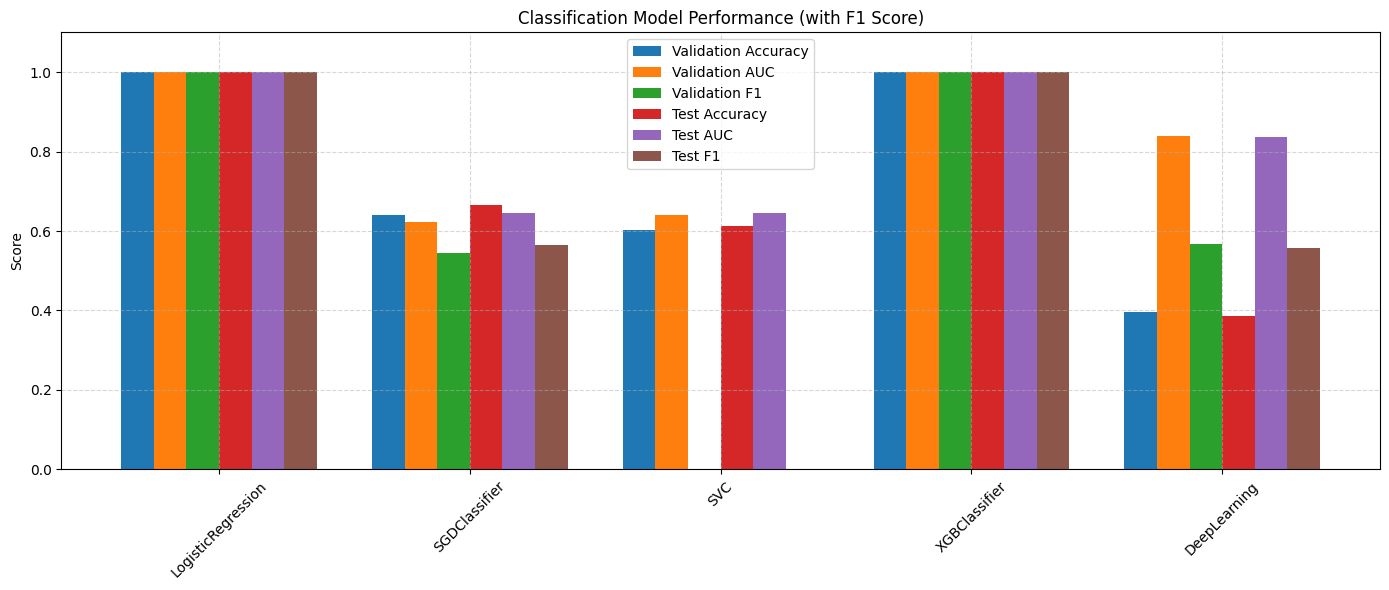

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

results = models_trained_stats

models = list(results.keys())
val_acc = [results[model].get('val_acc', 0) for model in models]
val_auc = [results[model].get('val_auc', 0) for model in models]
test_acc = [results[model].get('test_acc', 0) for model in models]
test_auc = [results[model].get('test_auc', 0) for model in models]
val_f1 = [results[model].get('val_f1', 0) for model in models]
test_f1 = [results[model].get('test_f1', 0) for model in models]


x = np.arange(len(models))
width = 0.13



plt.figure(figsize=(14, 6))
plt.bar(x - 2.5*width, val_acc, width, label='Validation Accuracy')
plt.bar(x - 1.5*width, val_auc, width, label='Validation AUC')
plt.bar(x - 0.5*width, val_f1, width, label='Validation F1')
plt.bar(x + 0.5*width, test_acc, width, label='Test Accuracy')
plt.bar(x + 1.5*width, test_auc, width, label='Test AUC')
plt.bar(x + 2.5*width, test_f1, width, label='Test F1')





plt.ylabel('Score')
plt.title('Classification Model Performance (with F1 Score)')
plt.xticks(x, models, rotation=45)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
models_trained

{'LogisticRegression': LogisticRegression(max_iter=1000),
 'SGDClassifier': SGDClassifier(loss='log_loss'),
 'SVC': SVC(probability=True),
 'XGBClassifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=None,
               n_jobs=None, num_parallel_tree=None, random_state=None, ...),
 'deep_learning_logistic_regression': Fire_prediction_model(
   (fc1)

In [ ]:
models_trained_stats

{'LogisticRegression': {'val_acc': 1.0,
  'val_auc': np.float64(1.0),
  'val_f1': 1.0,
  'test_acc': 1.0,
  'test_auc': np.float64(1.0),
  'test_f1': 1.0},
 'SGDClassifier': {'val_acc': 0.6396825396825396,
  'val_auc': np.float64(0.6233157894736843),
  'val_f1': 0.5450901803607214,
  'test_acc': 0.665079365079365,
  'test_auc': np.float64(0.6460226790112971),
  'test_f1': 0.5649484536082474},
 'SVC': {'val_acc': 0.6031746031746031,
  'val_auc': np.float64(0.6407894736842105),
  'val_f1': 0.0,
  'test_acc': 0.6126984126984127,
  'test_auc': np.float64(0.6454387157054277),
  'test_f1': 0.0},
 'XGBClassifier': {'val_acc': 1.0,
  'val_auc': np.float64(1.0),
  'val_f1': 1.0,
  'test_acc': 1.0,
  'test_auc': np.float64(1.0),
  'test_f1': 1.0},
 'DeepLearning': {'val_acc': 0.3968253968253968,
  'val_auc': np.float64(0.8398105263157895),
  'val_f1': 0.5681818181818182,
  'test_acc': 0.3873015873015873,
  'test_auc': np.float64(0.8361292788584049),
  'test_f1': 0.5583524027459954}}

In [ ]:
deep_learning_model_inference= torch.tensor(filled_df[features_to_train_cols].values, dtype=torch.float32)
models_trained['deep_learning_logistic_regression'].eval()
results=models_trained['deep_learning_logistic_regression'](deep_learning_model_inference)

In [26]:
def model_voting(models_trained: dict, dataframe: pd.DataFrame) -> list:

    # Deep Learning Model
    deep_learning_model_inference = torch.tensor(dataframe, dtype=torch.float32)
    models_trained['deep_learning_logistic_regression'].eval()
    with torch.no_grad():
        results = models_trained['deep_learning_logistic_regression'](deep_learning_model_inference)
        results = torch.sigmoid(results).squeeze()

    # Scikit-learn Model, FIX-ME: ADD MORE MODELS!!!.
    results2 = models_trained['SGDClassifier'].predict_proba(dataframe)[:, 1]  # Probability for class 1

    # Average and threshold
    final_prediction_proba = (results.numpy() + results2) / 2
    final_predictions = (final_prediction_proba >= 0.5).astype(int)

    return final_predictions


train, test, val=data_used
x_train,y_train_true=train
x_test,y_test_true=train
x_val, y_val_true=val
def evaluate_model(y_true, y_pred, label=""):
    print(f"Evaluation on {label} set:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# Example usage:
evaluate_model(y_train_true, model_voting(loaded_models,x_train), label="Train")
evaluate_model(y_val_true, model_voting(loaded_models,x_val), label="Validation")
evaluate_model(y_test_true, model_voting(loaded_models,x_test), label="Test")



🧪 Evaluation on Train set:
Accuracy: 0.6800544588155207
Precision: 0.6784164473417686
Recall: 0.6800544588155207
F1 Score: 0.6791544252617936
Confusion Matrix:
 [[1356  454]
 [ 486  642]]

🧪 Evaluation on Validation set:
Accuracy: 0.6857142857142857
Precision: 0.6834535807928588
Recall: 0.6857142857142857
F1 Score: 0.6844726631393298
Confusion Matrix:
 [[306  95]
 [103 126]]

🧪 Evaluation on Test set:
Accuracy: 0.6800544588155207
Precision: 0.6784164473417686
Recall: 0.6800544588155207
F1 Score: 0.6791544252617936
Confusion Matrix:
 [[1356  454]
 [ 486  642]]


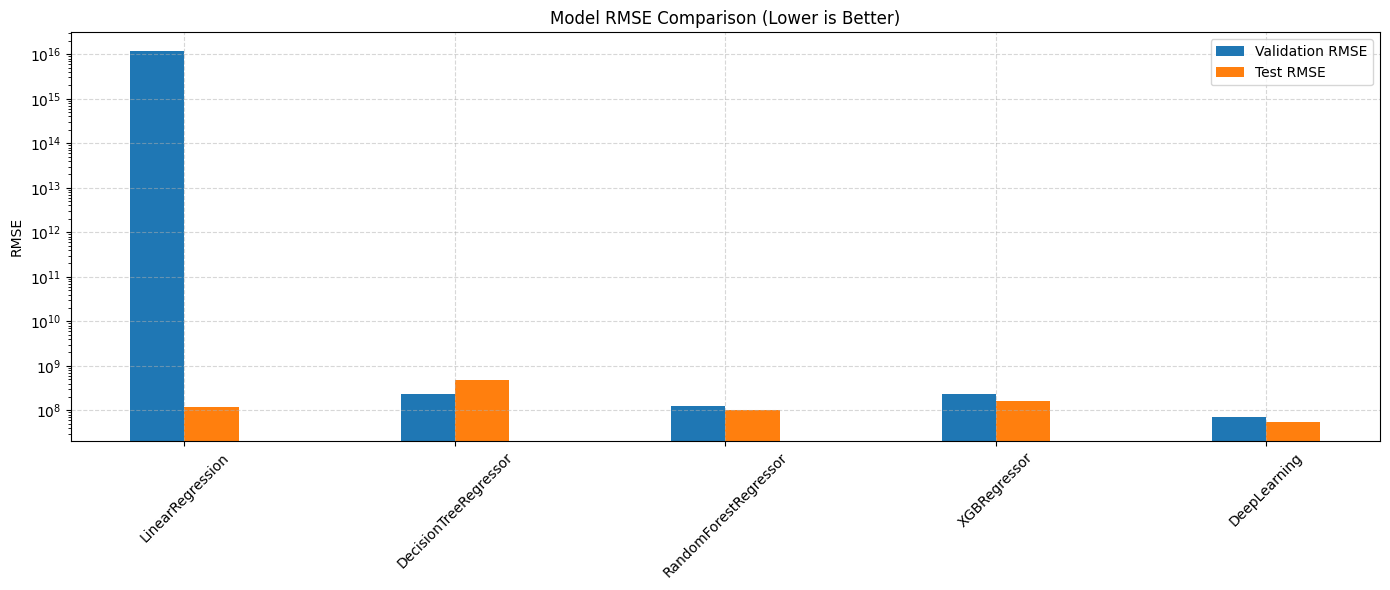

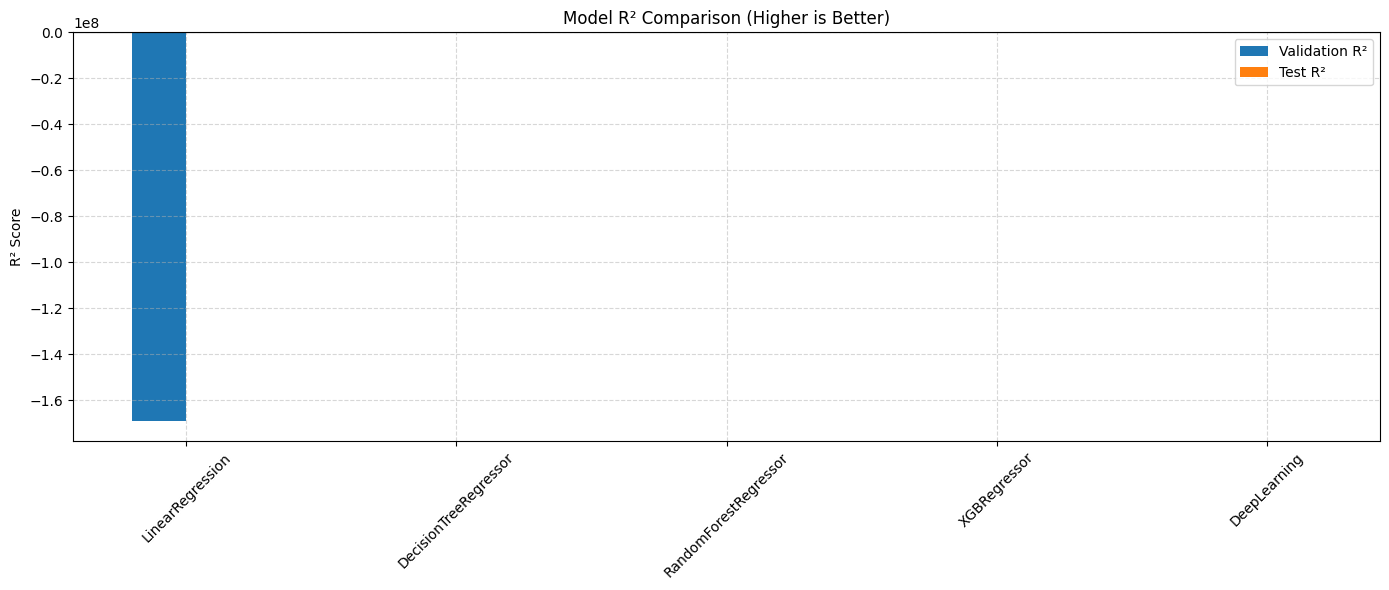

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

results=models_trained_stats
models = list(results.keys())
val_rmse = [results[model]['val_rmse'] for model in models]
val_r2 = [results[model]['val_r2'] for model in models]
test_rmse = [results[model]['test_rmse'] for model in models]
test_r2 = [results[model]['test_r2'] for model in models]

x = np.arange(len(models))
width = 0.2

# Plot RMSE
plt.figure(figsize=(14, 6))
plt.bar(x - width/2, val_rmse, width, label='Validation RMSE')
plt.bar(x + width/2, test_rmse, width, label='Test RMSE')
plt.ylabel('RMSE')
plt.title('Model RMSE Comparison (Lower is Better)')
plt.xticks(x, models, rotation=45)
plt.yscale('log')  # RMSE varies widely, log scale helps visualize
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Plot R^2 Score
plt.figure(figsize=(14, 6))
plt.bar(x - width/2, val_r2, width, label='Validation R²')
plt.bar(x + width/2, test_r2, width, label='Test R²')
plt.ylabel('R² Score')
plt.title('Model R² Comparison (Higher is Better)')
plt.xticks(x, models, rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.axhline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.legend()
plt.show()
